In [1]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import shutil

## Data

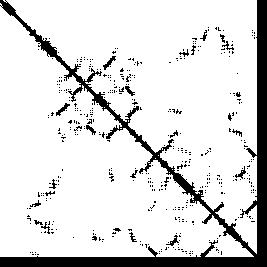

In [2]:
# Let's plot an example of a cmap
cmaps = os.listdir('cmaps')
Image.open(os.path.join('cmaps', cmaps[0]))

The black columns and rows must be artifact so we need to get rid of them

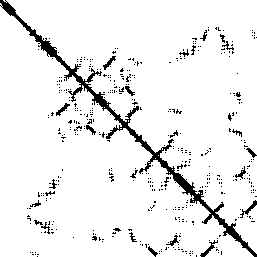

In [3]:
img = np.array(Image.open(os.path.join('cmaps', cmaps[0])))
img_corrected = img[img.any(axis=1)][:, img.any(axis=0)]
Image.fromarray(img_corrected)

## Preprocessing

Let's collect all the data

In [4]:
maps = []
for map in cmaps:
    im = np.asarray(Image.open(os.path.join('cmaps', map)))
    im_correct = im[im.any(axis=1)][:, im.any(axis=0)]
    im_rescale = - (im_correct // 255) + 1
    maps.append(im_rescale)

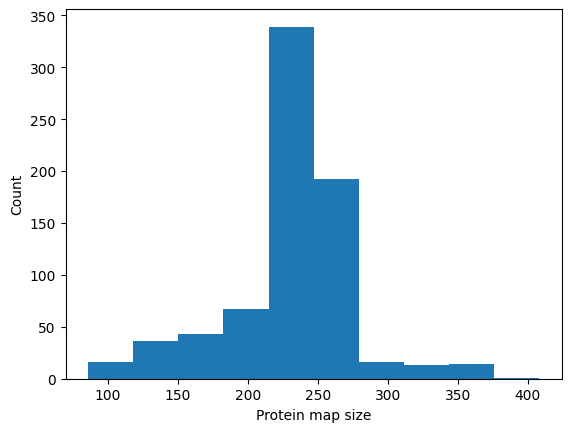

In [5]:
size = []
for j in maps:
    size.append(j.shape)
size = np.array(size)
plt.hist(size[:,0])
plt.ylabel('Count')
plt.xlabel('Protein map size')
plt.savefig('shape_distribution.png')
plt.show()

We have different shape of images let's pad them for now and see what we get

In [6]:
np.max(size[:,0]), np.max(size[:,1])

(408, 408)

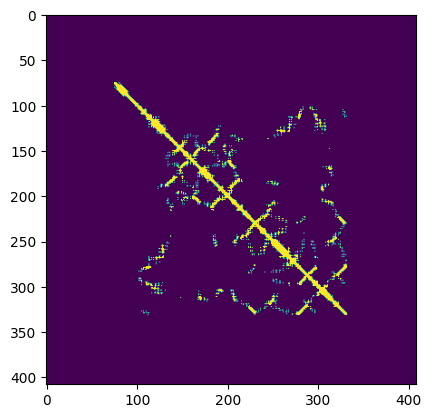

In [11]:
maps = []
max_size = 408
for map in cmaps:
    im = np.asarray(Image.open(os.path.join('cmaps', map)))
    im_correct = im[im.any(axis=1)][:, im.any(axis=0)]
    n, p = im_correct.shape
    im_rescale = - (im_correct // 255) + 1
    im_rescale = np.pad(im_rescale, [((max_size - n) // 2, (max_size - n) - (max_size - n) // 2), ((max_size - p) // 2, (max_size - p) - (max_size - p) // 2)])

    maps.append(im_rescale)

plt.imshow(maps[0])
plt.show()

## Cluster analysis

In [8]:
maps = []
for map in cmaps:
    im = np.asarray(Image.open(os.path.join('cmaps', map)))
    im_correct = im[im.any(axis=1)][:, im.any(axis=0)]
    n, p = im_correct.shape
    im_rescale = - (im_correct // 255) + 1
    im_rescale = np.pad(im_rescale, [(0, 408 - n), (0, 408 - p)])

    maps.append(im_rescale.reshape(-1))

In [9]:
flatten_maps = np.array(maps)


In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, init = "random", n_init = 10, random_state = 0).fit(flatten_maps)
cluster_des = kmeans.fit_predict(flatten_maps)

KeyboardInterrupt: 

Save the resulting clusters in dedicated directories

In [ ]:
if not(os.path.isdir('clusters_kmean')):
    os.mkdir('clusters_kmean')
for clust, path in zip(cluster_des, cmaps):
    if not(os.path.isdir(os.path.join('clusters_kmean', f'cluster_{clust}'))):
        os.mkdir(os.path.join('clusters_kmean', f'cluster_{clust}'))
    shutil.copy(os.path.join('cmaps', path), os.path.join('clusters_kmean', f'cluster_{clust}', path))